# Predict The Stock Market
* USING MACHINE LEARNING

In [4]:
import yfinance as yf
import pandas as pd
import os

Check and Read file

In [5]:
if os.path.exists("Predict_The_Stock_Market"):
    df = pd.read_csv("Predict_The_Stock_Market", index_col=0)
else:
    df = yf.Ticker("^GSPC")
    df = df.history(period="max")
    df.to_csv("Predict_The_Stock_Market")
    
df = pd.read_csv('C:\Data_cleaning\Data_for_project\Predict_The_Stock_Market.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
2,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
3,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
4,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0


Convert string to object DateTime

In [6]:
df.index = pd.to_datetime(df.index)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1970-01-01 00:00:00.000000000,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1970-01-01 00:00:00.000000001,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1970-01-01 00:00:00.000000002,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1970-01-01 00:00:00.000000003,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1970-01-01 00:00:00.000000004,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000023950,2023-05-05 00:00:00-04:00,4084.729980,4147.020020,4084.729980,4136.250000,4186270000,0.0,0.0
1970-01-01 00:00:00.000023951,2023-05-08 00:00:00-04:00,4136.979980,4142.299805,4123.810059,4138.120117,3641640000,0.0,0.0
1970-01-01 00:00:00.000023952,2023-05-09 00:00:00-04:00,4124.250000,4130.350098,4116.649902,4119.169922,3810140000,0.0,0.0
1970-01-01 00:00:00.000023953,2023-05-10 00:00:00-04:00,4143.740234,4154.279785,4098.919922,4137.640137,4057160000,0.0,0.0


1. Open: Indicates the price when the market opened.
2. High: Highest price during the day.
3. Low: Lowest price during the day.
4. Close: Indicates the price when the exchange closed.
5. Volume: Indicates the total number of shares traded.

<Axes: >

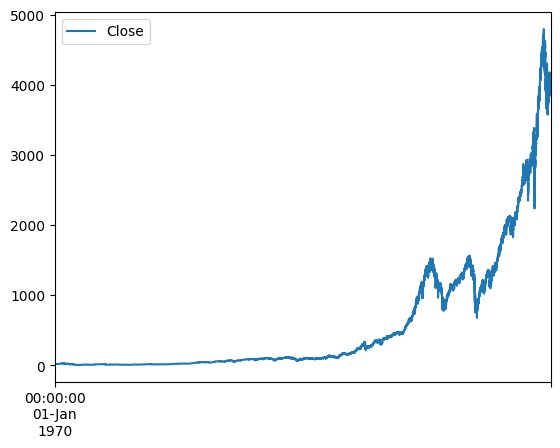

In [7]:
df.plot.line(y="Close", use_index=True)

Cleaning and Visualizing Our Stock Market Data
- we're not going to use 'Dividends' and 'Stock Splits'

In [8]:
del df["Dividends"]
del df["Stock Splits"]

* We predict whether the price of the stock will go up or down tomorrow.
* Target :Will tomorrow's price be greater than today's price?

In [9]:
df["Tomorrow"] = df["Close"].shift(-1)
df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)    #astype(int) is used to convert boolean True/False to 1/0.
df

,Date,Open,High,Low,Close,Volume,Tomorrow,Target
1970-01-01 00:00:00.000000000,1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1970-01-01 00:00:00.000000001,1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1970-01-01 00:00:00.000000002,1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1970-01-01 00:00:00.000000003,1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1970-01-01 00:00:00.000000004,1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000023950,2023-05-05 00:00:00-04:00,4084.729980,4147.020020,4084.729980,4136.250000,4186270000,4138.120117,1
1970-01-01 00:00:00.000023951,2023-05-08 00:00:00-04:00,4136.979980,4142.299805,4123.810059,4138.120117,3641640000,4119.169922,0
1970-01-01 00:00:00.000023952,2023-05-09 00:00:00-04:00,4124.250000,4130.350098,4116.649902,4119.169922,3810140000,4137.640137,1
1970-01-01 00:00:00.000023953,2023-05-10 00:00:00-04:00,4143.740234,4154.279785,4098.919922,4137.640137,4057160000,4130.620117,0


Machine Learning Model

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = df.iloc[:-100]
test = df.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

 Building a Backtesting System 
 1. splitting the data, training a model, and making predictions.
 2. test across multiple years of data.
 3. Measure the model's accuracy.

In [11]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.4117647058823529

<Axes: >

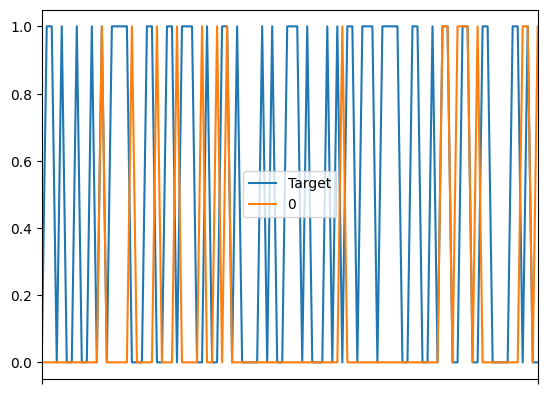

In [12]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [13]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
result = predict(train, test, predictors, model)
print(result)

                               Target  Predictions
1970-01-01 00:00:00.000023855       0            0
1970-01-01 00:00:00.000023856       1            0
1970-01-01 00:00:00.000023857       1            0
1970-01-01 00:00:00.000023858       0            0
1970-01-01 00:00:00.000023859       1            0
...                               ...          ...
1970-01-01 00:00:00.000023950       1            0
1970-01-01 00:00:00.000023951       0            1
1970-01-01 00:00:00.000023952       1            1
1970-01-01 00:00:00.000023953       0            0
1970-01-01 00:00:00.000023954       0            1

[100 rows x 2 columns]


In [14]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [15]:
predictions = backtest(df, model, predictors)

In [16]:
predictions["Predictions"].value_counts()

Predictions
0    12137
1     9318
Name: count, dtype: int64

In [17]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5166344709165057

In [18]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.525891
0    0.474109
Name: count, dtype: float64

In [19]:
horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = df["Close"].rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df["Close"] / rolling_averages

    trend_column = f"Trend_{horizon}"
    df[trend_column] = df["Target"].rolling(horizon).sum()

    new_predictors += [ratio_column, trend_column]


In [20]:
df = df.dropna(subset=df.columns[df.columns != "Tomorrow"])

In [21]:
df

,Date,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
1970-01-01 00:00:00.000000999,1931-12-28 00:00:00-05:00,7.760000,7.760000,7.760000,7.760000,0,7.960000,1,0.987277,1.0,0.967340,3.0,0.798244,24.0,0.566227,105.0,0.384213,521.0
1970-01-01 00:00:00.000001000,1931-12-29 00:00:00-05:00,7.960000,7.960000,7.960000,7.960000,0,8.100000,1,1.012723,2.0,0.996994,3.0,0.821282,25.0,0.582074,105.0,0.394305,521.0
1970-01-01 00:00:00.000001001,1931-12-30 00:00:00-05:00,8.100000,8.100000,8.100000,8.100000,0,8.120000,1,1.008717,2.0,1.019381,4.0,0.837787,25.0,0.593657,105.0,0.401432,522.0
1970-01-01 00:00:00.000001002,1931-12-31 00:00:00-05:00,8.120000,8.120000,8.120000,8.120000,0,7.560000,0,1.001233,1.0,1.017544,3.0,0.842149,25.0,0.596489,104.0,0.402615,522.0
1970-01-01 00:00:00.000001003,1932-01-04 00:00:00-05:00,7.560000,7.560000,7.560000,7.560000,0,7.550000,0,0.964286,0.0,0.956962,3.0,0.785781,24.0,0.556754,104.0,0.375034,521.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000023950,2023-05-05 00:00:00-04:00,4084.729980,4147.020020,4084.729980,4136.250000,4186270000,4138.120117,1,1.009153,2.0,1.005131,2.0,1.021944,31.0,1.044372,115.0,1.106179,533.0
1970-01-01 00:00:00.000023951,2023-05-08 00:00:00-04:00,4136.979980,4142.299805,4123.810059,4138.120117,3641640000,4119.169922,0,1.000226,1.0,1.007042,2.0,1.022168,30.0,1.044689,114.0,1.106301,533.0
1970-01-01 00:00:00.000023952,2023-05-09 00:00:00-04:00,4124.250000,4130.350098,4116.649902,4119.169922,3810140000,4137.640137,1,0.997705,1.0,1.002450,3.0,1.017366,30.0,1.039781,115.0,1.100859,533.0
1970-01-01 00:00:00.000023953,2023-05-10 00:00:00-04:00,4143.740234,4154.279785,4098.919922,4137.640137,4057160000,4130.620117,0,1.002237,1.0,1.004652,3.0,1.021927,30.0,1.044230,115.0,1.105419,533.0


In [22]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [23]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [24]:
predictions = backtest(df, model, new_predictors)

In [25]:
predictions["Predictions"].value_counts()

Predictions
1.0    10817
0.0     9639
Name: count, dtype: int64

In [26]:
precision_score(predictions["Target"], predictions["Predictions"])

0.9995377646297494

In [27]:
predictions["Target"].value_counts() / predictions.shape[0]
predictions

,Target,Predictions
1970-01-01 00:00:00.000003499,0,0.0
1970-01-01 00:00:00.000003500,0,0.0
1970-01-01 00:00:00.000003501,0,0.0
1970-01-01 00:00:00.000003502,0,0.0
1970-01-01 00:00:00.000003503,1,1.0
...,...,...
1970-01-01 00:00:00.000023950,1,1.0
1970-01-01 00:00:00.000023951,0,0.0
1970-01-01 00:00:00.000023952,1,1.0
1970-01-01 00:00:00.000023953,0,0.0


: 